
<p align="center">
    <img src="mosef.png" alt="MOSEF Logo" width="300">
</p>
```
</p>

<a href="https://linkedin.com/lucasvazelle">Vazelle Lucas, Tarverdian Mariam, Nguyen Nhi </a> $\cdot$ 2024-2025, MOSEF $\cdot$ 

---

Times series
- [Import données](https://cds.climate.copernicus.eu/datasets/sis-ocean-wave-timeseries?tab=overview)
- [Documentation Copernicus](https://confluence.ecmwf.int/display/CKB/Product+user+guide+for+sea+level+and+ocean+wave+products+-+time+series+and+indicators)


In [ ]:
!pip install xarray netcdf4cartopy

     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.3 MB 1.3 MB/s eta 0:00:01
     -- ------------------------------------- 0.1/1.3 MB 1.7 MB/s eta 0:00:01
     ------- -------------------------------- 0.2/1.3 MB 1.8 MB/s eta 0:00:01
     ------------ --------------------------- 0.4/1.3 MB 2.3 MB/s eta 0:00:01
     ---------------- ----------------------- 0.5/1.3 MB 2.7 MB/s eta 0:00:01
     --------------------- ------------------ 0.7/1.3 MB 2.6 MB/s eta 0:00:01
     ---------------------------- ----------- 0.9/1.3 MB 2.8 MB/s eta 0:00:01
     ------------------------------------ --- 1.2/1.3 MB 3.2 MB/s eta 0:00:01
     ---------------------------------------  1.3/1.3 MB 3.2 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 3.1 MB/s eta 0:00:00
  Using cached partd-1.4.2-py3-none-any.whl (18 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl (179 kB)
  Using cached PyYAML-6.0.2-cp310-cp310


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import netCDF4 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Import donnée

In [ ]:
# import cdsapi

# dataset = "sis-ocean-wave-timeseries"
# request = {
#     "variable": [
#         "Mean wave direction",
#         "Mean wave period",
#         "Peak wave period",
#         "Significant wave height"
#     ],
#     "experiment": "ERA5 reanalysis",
#     "year": ["2016", "2017"]
# }

# client = cdsapi.Client()
# client.retrieve(dataset, request).download()


# Analyse exploratoire
Locs correspond aux corrdonnées de la station, il y en a près de 8000

station_x_coordinate station_y_coordinate correspondent aux coordonnées latitude et longitude des stations

mp1 (m) : période moyenne des vagues océaniques générées par les vents locaux et la houle. La période des vagues est le temps moyen nécessaire à deux crêtes de vagues consécutives, à la surface de l'océan/de la mer, pour passer par un point fixe

mwd (dégré) : direction moyenne des vagues de surface de l'océan/de la mer générées par les vents locaux et la houle.

pp1d (m) :  la période des vagues océaniques les plus énergétiques générées par les vents et la houle locaux

swh (m):  hauteur moyenne du tiers le plus élevé des vagues de surface de l'océan/de la mer générées par le vent et la houle. Il représente la distance verticale entre la crête et le creux de la vague. 

In [ ]:
data_folder = "data"
netcdf_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith(".nc")]

In [127]:
import xarray as xr
ds = xr.open_dataset(netcdf_files[2])
ds


<xarray.Dataset> Size: 542MB
Dimensions:               (scalar: 1, time: 8784, locs: 7708)
Coordinates:
  * time                  (time) datetime64[ns] 70kB 2016-01-01 ... 2016-12-3...
    station_x_coordinate  (locs) float64 62kB ...
    station_y_coordinate  (locs) float64 62kB ...
Dimensions without coordinates: scalar, locs
Data variables:
    missing_value         (scalar) float64 8B ...
    mwd                   (time, locs) float64 542MB ...
Attributes: (12/18)
    title:                SAW ERA5 - MWD
    institution:          Deltares, www.deltares.nl
    project:              C3S_422_Lot2 Deltares
    geospatial_lon_min:   43.6
    geospatial_lat_max:   79.1
    time_coverage_end:    
    ...                   ...
    licence:              
    keywords:             waves, future climate runs, historical climate runs...
    summary:              wave parameters at locations along 20-m depth line ...
    geospatial_lon_max:   322.1
    history:              Wed Mar 20 15:57:24 2019: ncatted -a standard_name,...
    NCO:                  netCDF Operators version 4.7.8 (Homepage = http://n...

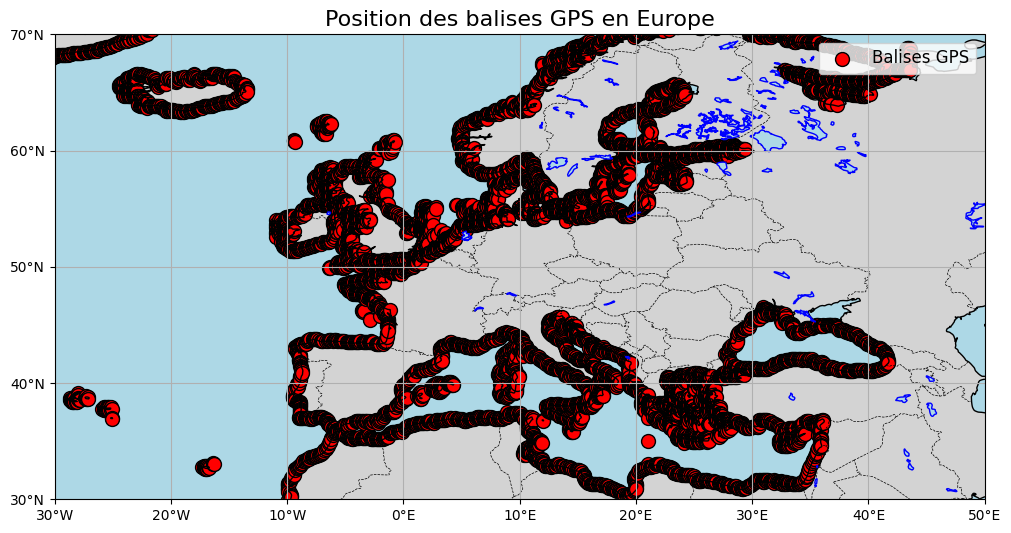

In [152]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extraire les coordonnées des stations
longitude = ds['station_x_coordinate'].values
latitude = ds['station_y_coordinate'].values

# Créer une figure avec une projection géographique
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 10))

# Centrer la carte sur l'Europe (limites : longitude et latitude)
ax.set_extent([-30, 50, 30, 70], crs=ccrs.PlateCarree())  # Europe et alentours

# Ajouter des fonds de carte
ax.add_feature(cfeature.COASTLINE, linewidth=1)  # Lignes de côtes
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5)  # Frontières
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Continents en gris clair
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Océans en bleu clair
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='lightblue')  # Lacs

# Tracer les positions des balises
sc = ax.scatter(longitude, latitude, s=100, color='red', edgecolor='k', transform=ccrs.PlateCarree(), label='Balises GPS')

# Ajouter une légende
ax.legend(fontsize=12, loc='upper right')

# Ajouter une grille de latitude et longitude
ax.grid(True)  # Afficher la grille
ax.set_xticks(range(-30, 51, 10))  # Plages de longitude (modifiables)
ax.set_yticks(range(30, 71, 10))  # Plages de latitude (modifiables)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x}°E' if x >= 0 else f'{-x}°W'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y}°N'))

# Afficher les numéros pour certaines balises seulement
for i, (lon, lat) in enumerate(zip(longitude, latitude)):
    # Condition : Afficher les numéros des balises uniquement pour des coordonnées spécifiques
    if 60 <= lon <= 70 and -10 <= lat <= 0:  # Exemple : afficher les numéros pour ces régions géographiques
        ax.text(lon, lat, str(i), fontsize=10, ha='right', color='blue', transform=ccrs.PlateCarree())

# Ajouter un titre
ax.set_title('Position des balises GPS en Europe', fontsize=16)

plt.show()


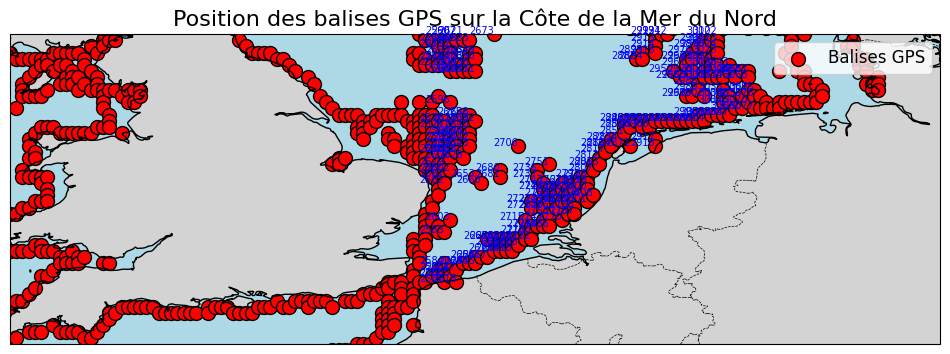

In [182]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extraire les coordonnées des stations
longitude = ds['station_x_coordinate'].values
latitude = ds['station_y_coordinate'].values

# Créer une figure avec une projection géographique
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 10))

# Centrer la carte sur la côte de la mer du Nord (limites : longitude et latitude)
ax.set_extent([-5, 10, 50, 55], crs=ccrs.PlateCarree())  # Cote mer du Nord

# Ajouter des fonds de carte
ax.add_feature(cfeature.COASTLINE, linewidth=1)  # Lignes de côtes
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5)  # Frontières
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Continents en gris clair
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Océans en bleu clair

# Tracer les positions des balises
sc = ax.scatter(longitude, latitude, s=100, color='red', edgecolor='k', transform=ccrs.PlateCarree(), label='Balises GPS')

# Afficher les numéros de chaque balise à côté de sa position
for i, (lon, lat) in enumerate(zip(longitude, latitude)):
    if 2 <= lon <= 7 and 50 <= lat <= 55:  # Afficher uniquement pour la mer du Nord
        ax.text(lon, lat, str(i), fontsize=7, ha='right', color='blue', transform=ccrs.PlateCarree())

# Ajouter une légende
ax.legend(fontsize=12, loc='upper right')

# Ajouter un titre
ax.set_title('Position des balises GPS sur la Côte de la Mer du Nord', fontsize=16)

plt.show()


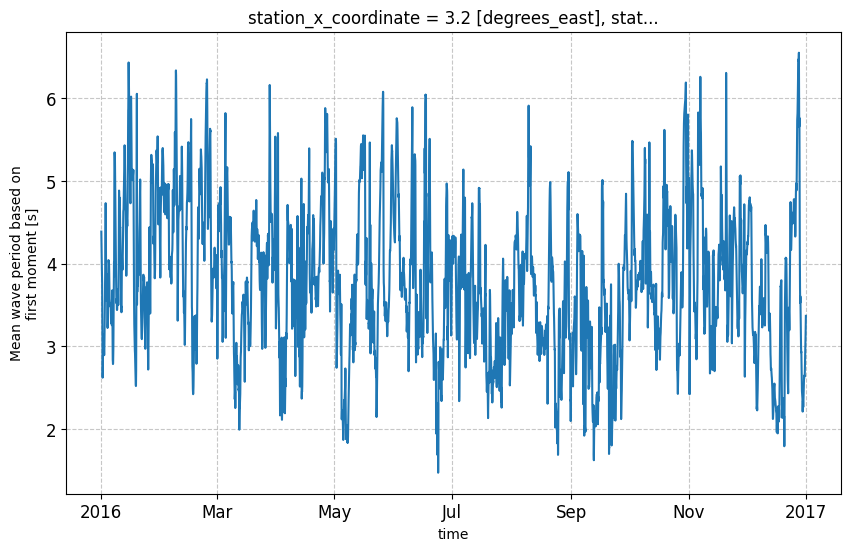

In [184]:
fig, ax = plt.subplots(figsize=(10, 6))  # Taille du graphique
xr.open_dataset(netcdf_files[0])['mp1'].isel(locs=2708).plot(ax=ax) 

ax.tick_params(axis='both', which='major', labelsize=12)  # Taille des labels des axes

# Afficher la grille
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [ ]:
# # Dunkerke
# lat_target = 56
# lon_target = 4

# filtered_datasets = []
# for file in netcdf_files:
#     # Charger le fichier NetCDF avec xarray
#     ds = xr.open_dataset(file)
    
#     # Utiliser "locs" pour sélectionner les indices de stations les plus proches
#     filtered_data = ds.sel(locs=1000)
#     df = filtered_data.to_dataframe().reset_index()

#     # Ajouter le dataset filtré à la liste
#     filtered_datasets.append(df)



# Préprocessing

à faire : 
 
 Preprocessing 
- filtre par ondelette
- transformation variable dégré en degré par du cos
- stationnarité
- mice pour NA
- ts fresh pour créer variable
- créer des variables à partir du temps
- choisir métrique
- bien decouper entrainement et test 

Modèle
- choix : modèle recursif ou direct ou hybride?
- Light GBM
- stacking avec elastic net comme méta model et different données d'entrainement pour chaque couche